# Breast Cancer Diagnostic
## The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. 

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- Class distribution: 357 benign, 212 malignant. More info about this dataset here

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay, 
                             accuracy_score, plot_confusion_matrix, auc, classification_report)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import plotly.express as px

In [2]:
# import data
X= pd.read_csv("X.csv")
y=pd.read_csv("y.csv")
y=y.values.ravel()

### Random Forest Important Variables

In [3]:
random=42
lassoXlist=['concave points_mean',
'compactness_se',
'smoothness_worst',
'compactness_mean',
'concave points_worst',
'concavity_se',
'symmetry_worst',
'concavity_worst',
'concavity_mean',
'symmetry_mean']
lassoX=X[lassoXlist].copy()


In [4]:
X_train, X_test, y_train, y_test = train_test_split(lassoX, y, test_size=0.30, random_state=random)

## Logistic Regression

In [5]:
lr= LogisticRegression(random_state=random, max_iter=5000)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.8743718592964824
Test Accuracy:  0.8830409356725146
Training ROC_AUC:  0.8483868359343414
Test ROC_AUC:  0.8511904761904763


## Tuning

In [6]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, random_state=42, solver='newton-cg')


0.974878835978836

In [7]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
17,0.006567,0.000559,0.005201,0.000702,1000,5000,l2,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",0.960000,...,0.978667,0.946667,0.946667,0.965333,1.000000,0.962857,1.000000,0.974879,0.024866,1
15,0.028928,0.007651,0.005970,0.001080,1000,5000,l2,newton-cg,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",0.960000,...,0.978667,0.946667,0.946667,0.965333,1.000000,0.962857,1.000000,0.974879,0.024866,1
16,0.076950,0.017299,0.006966,0.002416,1000,5000,l2,lbfgs,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",0.960000,...,0.978667,0.946667,0.946667,0.965333,1.000000,0.962857,1.000000,0.974879,0.024866,1
2,0.007474,0.001229,0.005434,0.000615,100,5000,l2,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.965333,...,0.973333,0.952000,0.933333,0.952000,1.000000,0.951429,1.000000,0.971732,0.026138,4
0,0.027236,0.003747,0.007336,0.001578,100,5000,l2,newton-cg,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.965333,...,0.973333,0.952000,0.933333,0.952000,1.000000,0.951429,1.000000,0.971643,0.026291,5
1,0.037169,0.011303,0.006367,0.000874,100,5000,l2,lbfgs,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.965333,...,0.973333,0.952000,0.933333,0.952000,1.000000,0.951429,1.000000,0.971643,0.026291,5
5,0.007900,0.001680,0.006901,0.001248,10,5000,l2,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.992000,...,0.949333,0.962667,0.901333,0.901333,0.986667,0.928571,0.983333,0.954156,0.033366,7
3,0.017220,0.001640,0.006209,0.001005,10,5000,l2,newton-cg,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.986667,...,0.946667,0.960000,0.904000,0.904000,0.986667,0.928571,0.983333,0.954069,0.033003,8
4,0.022552,0.003880,0.006400,0.001584,10,5000,l2,lbfgs,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.986667,...,0.946667,0.960000,0.904000,0.904000,0.986667,0.928571,0.983333,0.954069,0.033003,8
6,0.015498,0.001030,0.005734,0.000628,1,5000,l2,newton-cg,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l2', ...",0.986667,...,0.933333,0.957333,0.893333,0.890667,0.954667,0.897143,0.955556,0.936692,0.036242,10


In [57]:
lr= LogisticRegression(C=1000, max_iter=5000, random_state=42, solver='newton-cg')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9472361809045227
0.9239766081871345
Training ROC_AUC:  0.9376162367591171
Test ROC_AUC:  0.919973544973545


Accuracy : 92.4
precision : 89.06
recall : 90.48


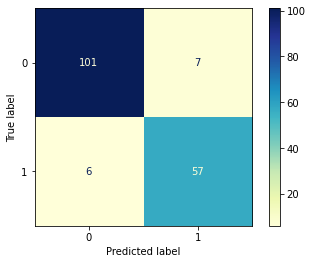

In [9]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [58]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.94      0.94      0.94       108
   Malignant       0.89      0.90      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



Text(0.5, 0, 'False Positive Rate')

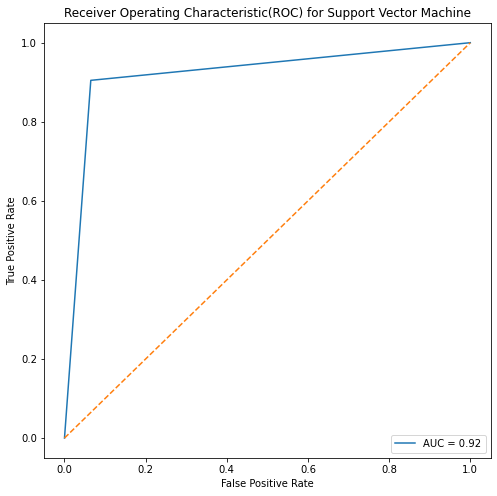

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

### LASSO Tuning

In [11]:
# define models and parameters
# define grid search
param_grid={'solver': ['liblinear'], 
            'penalty':['l1'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=10, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')


0.9769613756613755

In [12]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.020701,0.006471,0.010735,0.004479,10,5000,l1,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l1', '...",0.981333,...,0.976000,0.973333,0.946667,0.952000,1.000,0.977143,1.000000,0.976961,0.022134,1
0,0.029774,0.038091,0.007794,0.003031,100,5000,l1,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l1', ...",0.962667,...,0.981333,0.944000,0.952000,0.970667,1.000,0.977143,1.000000,0.976249,0.021972,2
5,0.023291,0.002993,0.005842,0.001215,1000,5000,l1,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l1',...",0.944000,...,0.984000,0.930667,0.952000,0.960000,1.000,0.977143,0.997222,0.974010,0.024510,3
2,0.008003,0.001966,0.005582,0.001314,1,5000,l1,liblinear,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l1', ...",0.997333,...,0.946667,0.976000,0.925333,0.912000,0.984,0.931429,0.980556,0.956486,0.031951,4
3,0.010033,0.010344,0.008238,0.007911,0.1,5000,l1,liblinear,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', ...",0.957333,...,0.896000,0.928000,0.893333,0.869333,0.952,0.865714,0.933333,0.918203,0.039480,5
4,0.005876,0.001059,0.005200,0.001579,0.01,5000,l1,liblinear,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l1',...",0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500,0.500000,0.500000,0.500000,0.000000,6


##### Tuned Model

In [13]:
lr= LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9447236180904522
Test Score:  0.9064327485380117
Training ROC_AUC:  0.9342605320611305
Test ROC_AUC:  0.8994708994708994


Accuracy : 90.64
precision : 87.3
recall : 87.3


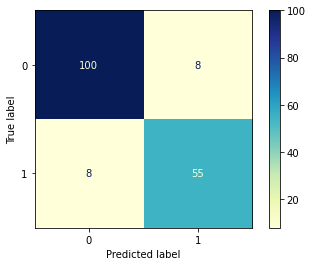

In [14]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [15]:
# last 5 are what was predicted incorrectly
residuals = lr.predict_proba(X_test)[:,1] - y_test
sortIdx=np.argsort(np.abs(residuals))
residDF=X_test.iloc[sortIdx].copy()
residDF["resid"]=residuals[sortIdx]
residDF['y_true']=y_test[sortIdx]
residDF['y_pred']=y_test_pred[sortIdx]
# print(residDF.std())
outliers=residDF.tail(15)
outliers
# outliers.std()
#sns.regplot(x = residuals, y = y_test_pred, scatter = True, color = 'red');

,concave points_mean,compactness_se,smoothness_worst,compactness_mean,concave points_worst,concavity_se,symmetry_worst,concavity_worst,concavity_mean,symmetry_mean,resid,y_true,y_pred
380,0.05550,0.017770,0.1610,0.11110,0.13180,0.02101,0.3343,0.22470,0.07900,0.2018,0.528523,0,1
86,0.04938,0.029830,0.1306,0.09947,0.12250,0.05371,0.3020,0.33490,0.12040,0.2075,-0.536430,1,0
54,0.03334,0.010300,0.1389,0.07081,0.15300,0.01603,0.2675,0.27120,0.05253,0.1616,-0.575017,1,0
255,0.05246,0.026790,0.1512,0.12790,0.13740,0.03119,0.3068,0.32090,0.09789,0.1908,-0.575559,1,0
396,0.05381,0.019570,0.1428,0.11470,0.14530,0.03304,0.2666,0.34380,0.08580,0.1806,0.581617,0,1
247,0.03980,0.055920,0.1254,0.13460,0.15610,0.08158,0.2639,0.77270,0.13740,0.1596,0.672901,0,1
89,0.07064,0.044120,0.1277,0.13390,0.13970,0.04436,0.3151,0.26040,0.09966,0.2116,0.672912,0,1
73,0.05069,0.020650,0.1411,0.12800,0.13830,0.01759,0.2589,0.27790,0.07789,0.1662,-0.694968,1,0
148,0.05532,0.022970,0.1316,0.10210,0.15990,0.03114,0.2691,0.31030,0.08487,0.1724,0.720781,0,1
275,0.07404,0.014890,0.1359,0.07210,0.08946,0.01267,0.2220,0.07153,0.05929,0.2015,0.743494,0,1


In [16]:
residDF.groupby('y_true').mean()

,concave points_mean,compactness_se,smoothness_worst,compactness_mean,concave points_worst,concavity_se,symmetry_worst,concavity_worst,concavity_mean,symmetry_mean,resid,y_pred
y_true,,,,,,,,,,,,
0,0.025749,0.021112,0.125902,0.079677,0.073641,0.024923,0.276775,0.166156,0.045052,0.176876,0.103568,0.074074
1,0.091669,0.033734,0.147222,0.153177,0.189681,0.041532,0.324095,0.477278,0.168397,0.193902,-0.125448,0.873016


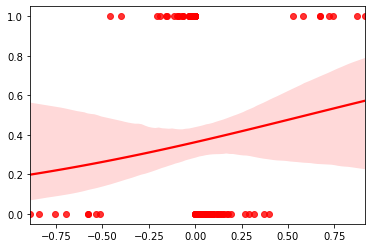

In [17]:
sns.regplot(x = residuals, y = y_test_pred, logistic=True, scatter = True, color = 'red');

In [ ]:
#sns.residplot(x=resid, y=y, lowess=True, color="g")

## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
#normal data helped this
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8994974874371859
0.9005847953216374
Training ROC_AUC:  0.8900299183310423
Test ROC_AUC:  0.8948412698412699


#### Bernoulli

In [19]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6256281407035176
0.631578947368421
Training ROC_AUC:  0.5
Test ROC_AUC:  0.5


### Tuning

In [20]:
param_grid= {'var_smoothing': np.logspace(0,-9, num=100)
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(gnb, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GaussianNB(var_smoothing=1.5199110829529332e-05)


0.9463259259259259

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [21]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
99,0.006667,0.001955,0.006834,0.001128,1e-09,{'var_smoothing': 1e-09},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
72,0.006634,0.001703,0.007010,0.002203,2.84804e-07,{'var_smoothing': 2.848035868435799e-07},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
71,0.007502,0.003836,0.010176,0.008076,3.51119e-07,{'var_smoothing': 3.5111917342151277e-07},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
70,0.006481,0.001288,0.006763,0.000954,4.32876e-07,{'var_smoothing': 4.3287612810830526e-07},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
69,0.006234,0.000761,0.006517,0.001114,5.3367e-07,{'var_smoothing': 5.336699231206313e-07},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
68,0.005867,0.000718,0.006567,0.000804,6.57933e-07,{'var_smoothing': 6.579332246575682e-07},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
67,0.005972,0.000484,0.006329,0.000591,8.11131e-07,{'var_smoothing': 8.111308307896872e-07},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
66,0.006737,0.001100,0.007273,0.001340,1e-06,{'var_smoothing': 1e-06},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
65,0.006367,0.000836,0.006467,0.000806,1.23285e-06,{'var_smoothing': 1.232846739442066e-06},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1
64,0.006068,0.000680,0.006667,0.000869,1.51991e-06,{'var_smoothing': 1.519911082952933e-06},1.0,0.976,0.954667,0.88,...,0.917333,0.968,0.874667,0.912,0.965333,0.925714,0.972222,0.946326,0.035339,1


##### Tuned Model

In [22]:
gnb = GaussianNB(var_smoothing=1.5199110829529332e-05)
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8994974874371859
0.9005847953216374
Training ROC_AUC:  0.8900299183310423
Test ROC_AUC:  0.8948412698412699


Text(0.5, 0, 'False Positive Rate')

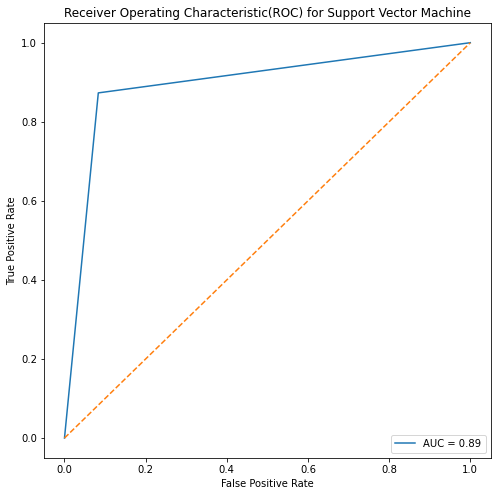

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
#KNN is more sensititve to noise
transformer = RobustScaler().fit(X)
X_scaled=transformer.transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9221105527638191
0.9590643274853801
Training ROC_AUC:  0.9067545349181962
Test ROC_AUC:  0.9477513227513227


### Tuning

In [25]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=21, p=1)


0.9708566137566137

In [26]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
40,0.008933,0.002695,0.010817,0.002317,21,1,"{'n_neighbors': 21, 'p': 1}",0.978667,0.996000,0.992000,...,0.965333,0.977333,0.980000,0.993333,0.996000,0.868571,0.972222,0.970857,0.030315,1
38,0.010768,0.007455,0.011733,0.005267,20,1,"{'n_neighbors': 20, 'p': 1}",0.978667,0.993333,0.989333,...,0.941333,0.976000,0.985333,0.997333,0.997333,0.868571,0.972222,0.970729,0.030571,2
36,0.007567,0.000883,0.009769,0.001023,19,1,"{'n_neighbors': 19, 'p': 1}",0.978667,0.994667,0.993333,...,0.941333,0.977333,0.986667,0.992000,0.997333,0.874286,0.972222,0.970589,0.030254,3
42,0.011078,0.004820,0.014235,0.006473,22,1,"{'n_neighbors': 22, 'p': 1}",0.978667,0.996000,0.992000,...,0.961333,0.974667,0.977333,0.993333,0.994667,0.868571,0.972222,0.970053,0.030255,4
46,0.012434,0.004640,0.013602,0.004985,24,1,"{'n_neighbors': 24, 'p': 1}",0.974667,0.997333,0.993333,...,0.958667,0.973333,0.976000,0.993333,0.994667,0.862857,0.986111,0.969385,0.031476,5
44,0.010200,0.003103,0.013635,0.004483,23,1,"{'n_neighbors': 23, 'p': 1}",0.974667,0.994667,0.990667,...,0.960000,0.973333,0.977333,0.990667,0.994667,0.868571,0.972222,0.969299,0.030338,6
48,0.011667,0.006128,0.015302,0.008157,25,1,"{'n_neighbors': 25, 'p': 1}",0.969333,0.997333,0.992000,...,0.958667,0.973333,0.973333,0.994667,0.994667,0.862857,0.986111,0.968854,0.031651,7
50,0.011301,0.006594,0.012635,0.003517,26,1,"{'n_neighbors': 26, 'p': 1}",0.968000,0.998667,0.993333,...,0.958667,0.969333,0.972000,0.994667,0.994667,0.861429,0.986111,0.968135,0.032153,8
56,0.007467,0.000846,0.009206,0.000914,29,1,"{'n_neighbors': 29, 'p': 1}",0.970667,1.000000,0.990667,...,0.952000,0.969333,0.970667,0.993333,0.994667,0.858571,0.986111,0.967857,0.032761,9
32,0.010634,0.003619,0.013668,0.005641,17,1,"{'n_neighbors': 17, 'p': 1}",0.981333,0.994667,0.993333,...,0.941333,0.981333,0.985333,0.989333,0.997333,0.880000,0.972222,0.967585,0.032415,10


##### Tuned Model

In [63]:
knn=KNeighborsClassifier(n_neighbors=21, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))


0.914572864321608
0.9590643274853801
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9477513227513227


In [62]:
knn=KNeighborsClassifier(n_neighbors=17, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.914572864321608
0.9649122807017544
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9523809523809523


Text(0.5, 0, 'False Positive Rate')

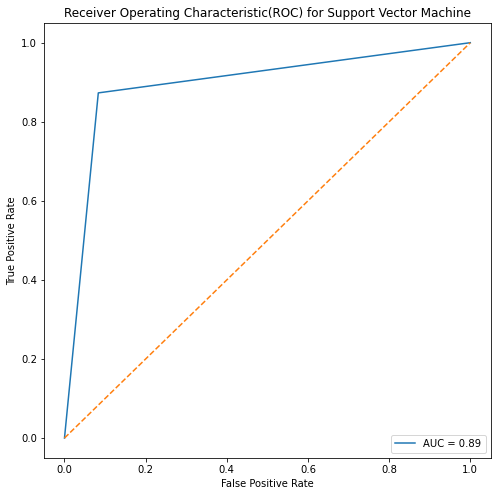

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## SVM

In [30]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9371859296482412
0.9298245614035088
Training ROC_AUC:  0.9228457453976981
Test ROC_AUC:  0.9212962962962963


### Tuning

In [31]:
param_grid= {'kernel' : ['poly', 'rbf', 'sigmoid'],
             'C' : [50, 10, 1.0, 0.1, 0.01],
             'gamma' : ['scale']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SVC(C=50)


0.9845793650793652

In [32]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.009187,0.001464,0.006134,0.001628,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.000000,...,0.981333,0.997333,0.960000,0.973333,1.000000,0.968571,0.994444,0.984579,0.014628,1
4,0.008075,0.001347,0.005768,0.000882,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.000000,...,0.973333,0.994667,0.938667,0.981333,1.000000,0.977143,0.994444,0.983887,0.016752,2
7,0.008100,0.000700,0.005668,0.000471,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.000000,...,0.957333,0.981333,0.936000,0.981333,0.992000,0.971429,0.997222,0.976442,0.020882,3
3,0.011100,0.001956,0.005658,0.001083,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.933333,1.000000,...,0.978667,0.928000,0.957333,0.957333,1.000000,0.965714,0.994444,0.975217,0.025791,4
6,0.009466,0.002500,0.005968,0.001224,1,scale,poly,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",0.928000,1.000000,...,0.978667,0.917333,0.946667,0.984000,0.994667,0.957143,0.997222,0.974051,0.028416,5
9,0.009533,0.003481,0.006967,0.001741,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.973333,1.000000,...,0.970667,0.946667,0.930667,0.997333,0.989333,0.934286,0.997222,0.971781,0.026545,6
0,0.021761,0.005254,0.006007,0.001234,50,scale,poly,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}",0.933333,0.997333,...,0.981333,0.930667,0.954667,0.944000,0.997333,0.965714,0.994444,0.968070,0.032703,7
10,0.009114,0.001360,0.006163,0.000939,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.989333,0.952000,...,0.936000,0.968000,0.896000,0.933333,0.962667,0.917143,0.975000,0.952598,0.029975,8
12,0.007300,0.000641,0.005234,0.000715,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",0.976000,0.965333,...,0.938667,0.941333,0.893333,0.904000,0.970667,0.911429,0.980556,0.945696,0.035245,9
13,0.010532,0.000991,0.006002,0.000731,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.984000,0.944000,...,0.925333,0.954667,0.901333,0.914667,0.954667,0.891429,0.952778,0.940216,0.032503,10


##### Tuned Model

In [33]:
clf = SVC(C=50, kernel='rbf')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9698492462311558
0.935672514619883
Training ROC_AUC:  0.9624268887631061
Test ROC_AUC:  0.9292328042328042


In [34]:
clf = SVC(C=10, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9673366834170855
0.9298245614035088
Training ROC_AUC:  0.9590711840651195
Test ROC_AUC:  0.9146825396825397


## Decision trees

In [35]:
# Decision trees
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.8947368421052632
Training ROC_AUC:  1.0
Test ROC_AUC:  0.8902116402116402


### Tuning

In [36]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 7, 'max_features': 0.8, 'max_leaf_nodes': 40, 'min_samples_leaf': 10}


0.9671050264550266

In [37]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
443,0.005833,0.000820,0.005068,0.000679,7,0.8,40,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",1.000000,...,0.938667,0.989333,0.940000,0.956000,1.000000,0.971429,0.979167,0.967105,0.026973,1
307,0.006775,0.000931,0.006101,0.000597,5,0.8,20,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",1.000000,...,0.928000,0.993333,0.949333,0.956000,0.970667,0.932857,0.983333,0.965687,0.025318,2
383,0.005673,0.000793,0.004902,0.000790,6,0.8,50,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.984000,...,0.950667,0.960000,0.925333,0.930667,0.968000,0.974286,0.983333,0.965632,0.025772,3
487,0.005732,0.000729,0.005402,0.001084,8,0.6,30,10,"{'max_depth': 8, 'max_features': 0.6, 'max_lea...",0.968000,...,0.946667,0.992000,0.920000,0.956000,1.000000,0.978571,0.976389,0.964200,0.033334,4
379,0.005708,0.000777,0.004931,0.000894,6,0.8,40,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.952000,...,0.950667,0.930667,0.937333,0.956000,0.970667,0.917143,0.983333,0.964079,0.023244,5
247,0.005499,0.000501,0.004407,0.000618,4,0.8,30,10,"{'max_depth': 4, 'max_features': 0.8, 'max_lea...",1.000000,...,0.930667,0.978667,0.888000,0.942667,0.982667,0.978571,0.969444,0.963858,0.031411,6
351,0.005143,0.000775,0.004934,0.000573,6,0.4,50,10,"{'max_depth': 6, 'max_features': 0.4, 'max_lea...",0.998667,...,0.990667,0.966667,0.876000,0.948000,1.000000,0.972857,0.965278,0.963132,0.034584,7
319,0.007100,0.001044,0.006570,0.001561,5,0.8,50,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",0.992000,...,0.921333,0.989333,0.949333,0.949333,0.966667,0.971429,0.990278,0.962967,0.029362,8
511,0.006101,0.000840,0.005396,0.000843,8,0.8,50,10,"{'max_depth': 8, 'max_features': 0.8, 'max_lea...",0.992000,...,0.920000,0.994667,0.949333,0.956000,0.968000,0.945714,0.987500,0.962854,0.027532,9
235,0.005533,0.000920,0.004901,0.000700,4,0.6,40,10,"{'max_depth': 4, 'max_features': 0.6, 'max_lea...",1.000000,...,0.954667,0.957333,0.904000,0.924000,0.993333,0.958571,0.984722,0.962704,0.029247,10


##### Tuned Model

In [38]:
clf=tree.DecisionTreeClassifier(max_depth= 7, max_features= 0.8, max_leaf_nodes= 40, min_samples_leaf= 10)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.949748743718593
0.8947368421052632
Training ROC_AUC:  0.9396242688876311
Test ROC_AUC:  0.8835978835978837


## Random Forest

In [59]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9298245614035088
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9179894179894181


### Tuning

In [51]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf_rf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=7, max_features=0.4, n_estimators=1000,
                       random_state=42)


0.9850222222222221

In [52]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
97,2.600955,0.123063,0.131075,0.016433,7,0.4,1000,"{'max_depth': 7, 'max_features': 0.4, 'n_estim...",1.000000,0.989333,...,0.984000,1.0,0.960000,0.994667,0.997333,0.962857,0.988889,0.985022,0.016152,1
125,2.046416,0.234151,0.106718,0.017580,8,0.4,1000,"{'max_depth': 8, 'max_features': 0.4, 'n_estim...",1.000000,0.989333,...,0.984000,1.0,0.960000,0.994667,0.997333,0.962857,0.988889,0.984930,0.016419,2
95,0.782383,0.054240,0.041210,0.003804,7,0.4,300,"{'max_depth': 7, 'max_features': 0.4, 'n_estim...",1.000000,0.989333,...,0.984000,1.0,0.957333,0.994667,1.000000,0.960000,0.988889,0.984921,0.016185,3
159,0.976193,0.089851,0.046927,0.004416,9,0.6,500,"{'max_depth': 9, 'max_features': 0.6, 'n_estim...",0.997333,0.989333,...,0.981333,1.0,0.965333,0.997333,0.994667,0.972857,0.988889,0.984770,0.017119,4
96,1.565069,0.252208,0.081386,0.017538,7,0.4,500,"{'max_depth': 7, 'max_features': 0.4, 'n_estim...",1.000000,0.989333,...,0.984000,1.0,0.957333,0.994667,0.997333,0.957143,0.988889,0.984743,0.016923,5
131,1.033774,0.058378,0.049960,0.005999,8,0.6,500,"{'max_depth': 8, 'max_features': 0.6, 'n_estim...",1.000000,0.986667,...,0.978667,1.0,0.968000,0.997333,0.994667,0.967143,0.988889,0.984713,0.016928,6
132,1.984330,0.158074,0.095944,0.021422,8,0.6,1000,"{'max_depth': 8, 'max_features': 0.6, 'n_estim...",0.997333,0.986667,...,0.981333,1.0,0.962667,0.994667,0.994667,0.968571,0.988889,0.984672,0.016335,7
94,0.501204,0.024651,0.028236,0.003457,7,0.4,200,"{'max_depth': 7, 'max_features': 0.4, 'n_estim...",1.000000,0.989333,...,0.981333,1.0,0.949333,0.994667,0.997333,0.957143,0.988889,0.984648,0.016231,8
153,1.717950,0.049674,0.093655,0.014827,9,0.4,1000,"{'max_depth': 9, 'max_features': 0.4, 'n_estim...",1.000000,0.989333,...,0.984000,1.0,0.960000,0.994667,0.997333,0.960000,0.988889,0.984608,0.016914,9
69,3.333112,0.820760,0.176367,0.072275,6,0.4,1000,"{'max_depth': 6, 'max_features': 0.4, 'n_estim...",1.000000,0.989333,...,0.984000,1.0,0.960000,0.994667,0.997333,0.960000,0.988889,0.984564,0.016379,10


##### Tuned Model

In [60]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=7, max_features=0.4, n_estimators=1000,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9298245614035088
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9179894179894181


In [61]:
clf_rf = RandomForestClassifier(max_depth=6, max_features=0.6, n_estimators=500,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9974874371859297
0.9298245614035088
Training ROC_AUC:  0.9966442953020134
Test ROC_AUC:  0.9146825396825397


## Stochastic Gradient D

In [40]:
#SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5000, random_state=random)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9371859296482412
0.9239766081871345
Training ROC_AUC:  0.9188027276892805
Test ROC_AUC:  0.9100529100529102


In [41]:
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty' : ['l2', 'l1', 'elasticnet'],
              'random_state':[random]
              }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SGDClassifier(loss='perceptron', max_iter=5000, penalty='elasticnet',
              random_state=42)


0.9737957671957673

In [42]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,param_random_state,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
14,0.007167,0.001099,0.004933,0.001434,perceptron,elasticnet,42,"{'loss': 'perceptron', 'penalty': 'elasticnet'...",0.954667,1.000000,...,0.973333,0.954667,0.941333,0.970667,0.997333,0.960000,1.0,0.973796,0.024205,1
1,0.011137,0.005924,0.008498,0.007039,hinge,l1,42,"{'loss': 'hinge', 'penalty': 'l1', 'random_sta...",0.960000,1.000000,...,0.973333,0.952000,0.936000,0.989333,0.997333,0.960000,1.0,0.972903,0.027568,2
6,0.008172,0.001912,0.005930,0.002019,modified_huber,l2,42,"{'loss': 'modified_huber', 'penalty': 'l2', 'r...",0.962667,1.000000,...,0.973333,0.933333,0.938667,0.952000,0.997333,0.965714,1.0,0.972578,0.026290,3
8,0.015268,0.008682,0.007233,0.003273,modified_huber,elasticnet,42,"{'loss': 'modified_huber', 'penalty': 'elastic...",0.960000,1.000000,...,0.973333,0.930667,0.941333,0.952000,1.000000,0.965714,1.0,0.972394,0.026956,4
13,0.008300,0.002912,0.006023,0.004425,perceptron,l1,42,"{'loss': 'perceptron', 'penalty': 'l1', 'rando...",0.928000,1.000000,...,0.973333,0.930667,0.941333,0.986667,0.997333,0.965714,1.0,0.972215,0.028601,5
12,0.007674,0.000864,0.005978,0.001235,perceptron,l2,42,"{'loss': 'perceptron', 'penalty': 'l2', 'rando...",0.957333,0.997333,...,0.973333,0.941333,0.936000,0.965333,0.997333,0.962857,1.0,0.971761,0.026412,6
4,0.010571,0.005767,0.006064,0.003900,log,l1,42,"{'loss': 'log', 'penalty': 'l1', 'random_state...",0.960000,1.000000,...,0.968000,0.949333,0.933333,0.968000,0.994667,0.957143,1.0,0.971741,0.026092,7
7,0.009706,0.003255,0.007870,0.004686,modified_huber,l1,42,"{'loss': 'modified_huber', 'penalty': 'l1', 'r...",0.920000,1.000000,...,0.973333,0.912000,0.944000,0.981333,0.997333,0.965714,1.0,0.971149,0.030820,8
2,0.012434,0.007210,0.009634,0.006540,hinge,elasticnet,42,"{'loss': 'hinge', 'penalty': 'elasticnet', 'ra...",0.960000,1.000000,...,0.973333,0.949333,0.928000,0.949333,0.994667,0.951429,1.0,0.969510,0.028139,9
0,0.011163,0.008457,0.008402,0.008077,hinge,l2,42,"{'loss': 'hinge', 'penalty': 'l2', 'random_sta...",0.960000,1.000000,...,0.970667,0.952000,0.930667,0.941333,0.994667,0.945714,1.0,0.968414,0.028414,10


##### Tuned Model

In [43]:
clf = SGDClassifier(loss='perceptron', max_iter=5000, penalty='elasticnet', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.7939698492462312
0.8128654970760234
Training ROC_AUC:  0.8299506751839574
Test ROC_AUC:  0.8518518518518519


In [44]:
clf = SGDClassifier(loss='hinge', max_iter=100, penalty='l1', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9396984924623115
0.9122807017543859
Training ROC_AUC:  0.9302444678041024
Test ROC_AUC:  0.9107142857142856


## Stochastic Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.935672514619883
Training ROC_AUC:  1.0
Test ROC_AUC:  0.925925925925926


### Tuning

In [46]:
param_grid = {'n_estimators' : [10, 100, 1000],
              'learning_rate' : [0.001, 0.01, 0.1],
              'subsample' : [0.5, 0.7, 1.0],
              'max_depth' : [3, 7, 9]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GradientBoostingClassifier(n_estimators=1000, subsample=0.5)


0.9854767195767196

In [47]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
60,2.402589,0.203925,0.007938,0.000813,0.1,3,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.981333,...,0.978667,1.000000,0.976000,0.984000,0.997333,0.968571,0.994444,0.985477,0.013497,1
61,2.562278,0.069608,0.007572,0.000884,0.1,3,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.978667,...,0.970667,1.000000,0.976000,0.984000,0.997333,0.965714,0.988889,0.985019,0.014434,2
39,0.264011,0.018641,0.003231,0.000846,0.01,7,100,0.5,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.992000,...,0.970667,0.997333,0.960000,1.000000,0.997333,0.971429,0.997222,0.984387,0.017052,3
34,1.476581,0.157451,0.004706,0.000899,0.01,3,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.989333,...,0.970667,0.997333,0.960000,0.994667,0.994667,0.957143,0.997222,0.983396,0.018412,4
16,6.482763,2.308877,0.012174,0.005455,0.001,7,1000,0.7,"{'learning_rate': 0.001, 'max_depth': 7, 'n_es...",0.994667,...,0.949333,1.000000,0.962667,1.000000,0.994667,0.971429,0.997222,0.983351,0.018830,5
25,6.685273,1.801380,0.010277,0.002043,0.001,9,1000,0.7,"{'learning_rate': 0.001, 'max_depth': 9, 'n_es...",0.994667,...,0.968000,0.997333,0.962667,1.000000,0.997333,0.960000,0.994444,0.982881,0.019033,6
33,1.178646,0.113179,0.004435,0.000767,0.01,3,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.992000,...,0.968000,0.997333,0.949333,0.997333,0.997333,0.957143,0.994444,0.982588,0.019461,7
15,5.191772,1.796544,0.010843,0.005456,0.001,7,1000,0.5,"{'learning_rate': 0.001, 'max_depth': 7, 'n_es...",0.997333,...,0.957333,0.997333,0.952000,1.000000,0.994667,0.951429,0.988889,0.982572,0.019630,8
58,0.333557,0.040652,0.008289,0.004092,0.1,3,100,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.992000,...,0.941333,0.997333,0.957333,0.994667,0.994667,0.957143,1.000000,0.982323,0.019788,9
24,6.674906,1.796623,0.012276,0.002945,0.001,9,1000,0.5,"{'learning_rate': 0.001, 'max_depth': 9, 'n_es...",0.997333,...,0.962667,0.997333,0.952000,1.000000,0.997333,0.960000,0.988889,0.982242,0.020265,10


##### Tuned Model

In [48]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.5, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9298245614035088
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9179894179894181


In [49]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, subsample=0.5, max_depth=7)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9899497487437185
0.935672514619883
Training ROC_AUC:  0.9865771812080537
Test ROC_AUC:  0.9226190476190477
